# Which Star Wars Movie is the Best?

_By: Zeth De Luna_

In the midst of the return of the Star Wars franchise with [_Star Wars: The Force Awakens_](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens), the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered, do the rest of Americans agree that _The Empire Strikes Back_ is the best Star Wars movie? To answer this question, they conducted an online survey, the results of which are available [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In this project, we'll clean the survey data and analyze the results. Hopefully, we'll be able to find out which movie Star Wars fans think is the best!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
# find file encoding
import chardet
chardet.detect(open('StarWars.csv', 'rb').read())

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [3]:
# read data
star_wars = pd.read_csv('StarWars.csv', encoding='Windows-1252')

In [4]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return 

In [5]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Cleaning the Dataset

People who take the survey are given an anonymous ID number, seen in the `RespondentID` column. If a row in the dataset has a `NaN` value in this column, it is likely that the row is an error. So, we'll remove all rows where `RespondentID` is null.

In [6]:
# remove rows where RespondentID is NaN
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [7]:
star_wars['RespondentID'].isnull().sum()

0

The next two columns, `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?`, contain "Yes", "No", and "NaN" values. To make analysis easier, we can convert the "Yes" and "No" strings to boolean values, where "Yes" is True and "No" is False.

In [8]:
# convert yes and no to True and False boolean values in columns index 1 & 2
def yes_no(string):
    if string == 'Yes':
        return True
    elif string == 'No':
        return False
    else:
        return np.nan

star_wars.iloc[:, 1:3] = star_wars.iloc[:, 1:3].applymap(yes_no)

In [9]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


The next 6 columns, listed below, contain information on whether or not the survey participant has seen any of the Star Wars Episodes 1-6:
* `Which of the following Star Wars films have you seen? Please select all that apply.`
* `Unnamed: 4`
* `Unnamed: 5`
* `Unnamed: 6`
* `Unnamed: 7`
* `Unnamed: 8`

A row containing the title of the movie indicates that the participant has seen the movie, and a row containing a `NaN` value indicates that the participant has not seen the movie. It would be easier to analyze the data if we converted the values in these columns to boolean values. If the value in the cell is the title of a movie, we'll replace it with `True` and if the value is `NaN` we'll replace it with `False`.

After that, we'll rename the columns to something more intuitive:
* `Which of the following Star Wars films have you seen? Please select all that apply.` : `seen_EP1`
* `Unnamed: 4` : `seen_EP2`
* `Unnamed: 5` : `seen_EP3`
* `Unnamed: 6` : `seen_EP4`
* `Unnamed: 7` : `seen_EP5`
* `Unnamed: 8` : `seen_EP6`

In [10]:
for i in range(3,9):
    print(star_wars.iloc[:, i].value_counts(dropna=False))

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64


In [11]:
# replace movie titles with True and NaNs with False
# since each title starts with 'Star Wars' we can use the string method .startswith
def seen(string):
    new_string = str(string)
    return new_string.startswith('Star Wars')

star_wars.iloc[:, 3:9] = star_wars.iloc[:, 3:9].applymap(seen)

In [12]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [13]:
# rename columns 3-8
seen_cols = {star_wars.columns[3]:'seen_EP1', 
             star_wars.columns[4]:'seen_EP2',
             star_wars.columns[5]:'seen_EP3', 
             star_wars.columns[6]:'seen_EP4', 
             star_wars.columns[7]:'seen_EP5', 
             star_wars.columns[8]:'seen_EP6'}

star_wars.rename(columns=seen_cols, inplace=True)

In [14]:
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_EP1,seen_EP2,seen_EP3,seen_EP4,seen_EP5,seen_EP6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


The next 6 columns contains the part of the survey where the participant is asked to rank the 6 movies, a rank of 1 being their favorite movie and a rank of 6 being their least favorite. To make analysis easier, we can convert the values in these columns to `float` type and make the column names more intuitive. We'll use the following columns names:
* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorit film.` : `rank_EP1`
* `Unnamed: 10` : `rank_EP2`
* `Unnamed: 11` : `rank_EP3`
* `Unnamed: 12` : `rank_EP4`
* `Unnamed: 13` : `rank_EP5`
* `Unnamed: 14` : `rank_EP6`

In [15]:
# convert values in columns 9-14 to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# rename columns
rank_cols = {star_wars.columns[9]:'rank_EP1', 
             star_wars.columns[10]:'rank_EP2',
             star_wars.columns[11]:'rank_EP3',
             star_wars.columns[12]:'rank_EP4',
             star_wars.columns[13]:'rank_EP5',
             star_wars.columns[14]:'rank_EP6'}

star_wars.rename(columns=rank_cols, inplace=True)

In [16]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_EP1,seen_EP2,seen_EP3,seen_EP4,seen_EP5,seen_EP6,rank_EP1,rank_EP2,rank_EP3,rank_EP4,rank_EP5,rank_EP6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


We've cleaned up all the columns that we would need to determine which Star Wars movies these participants view as their favorite. Now, let's take a look at these columns.

## What is the highest ranked Star Wars movie (according to fans)?

To find out, we'll find the average score for each movie and see which one has the highest average score.

### Ranks

<BarContainer object of 6 artists>

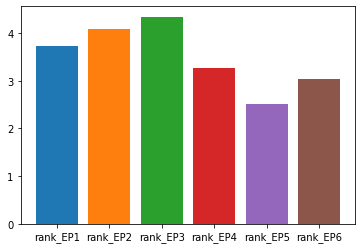

In [17]:
rank_columns = [star_wars.columns[i] for i in range(9,15)]

plt.bar(x=rank_columns, height=star_wars.iloc[:, 9:15].mean(), color=mcolors.TABLEAU_COLORS)

Recall that the ranking system we're using has 1 as the best rank and 6 as the worst rank. From the bar plot above, we can see that rank_EP5 has the best average ranking. In other words, _The Empire Strikes Back_ is indeed the best Star Wars movie (according to fans).

We can also see that the Original Trilogy (Episodes 4, 5, and 6) are all ranked better than the Prequel Trilogy (Episodes 1, 2, and 3). There are many factors that can play into this, including nostalgia, sentiment, and the accepted idea about movies that the orignals are always better than the sequels (or in this case, the prequels). Or, it could be just that the acting and some story lines in the Prequel Trilogy are just downright horrendous.

Another factor that could play into the rankings is the view counts of each movie. Since the Original Trilogy was released about 2-3 decades before the Prequel Trilogy, it is more likely that those movies have reached a much larger audience. Let's take a look at the view counts for each movie.

### View Counts

<BarContainer object of 6 artists>

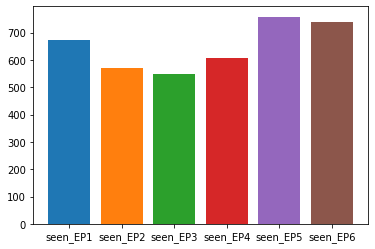

In [18]:
seen_columns = [star_wars.columns[i] for i in range(3,9)]

plt.bar(x=seen_columns, height=star_wars.iloc[:, 3:9].sum(), color=mcolors.TABLEAU_COLORS)

In [19]:
print('View Count for Original Trilogy: {}'.format(sum(star_wars.iloc[:, 6:9].sum())))
print('View Count for Prequel Trilogy: {}'.format(sum(star_wars.iloc[:, 3:6].sum())))

View Count for Original Trilogy: 2103
View Count for Prequel Trilogy: 1794


Although the Original Trilogy does in fact have a higher view count than the Prequel Trilogy, the gap between them doesn't seem large enough for release date to be a significant factor. 

The number of views per movie does reflect the results we saw in the rankings. The movies with higher rankings are more popular and have thus been seen by more people.

### Rankings and View Count Based on Gender (Binary)

Let's examine how male participants responded compared to female participants.

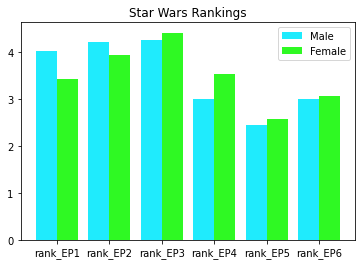

In [20]:
# create dataframes separating participants by gender
males = star_wars[star_wars['Gender']=='Male']
females = star_wars[star_wars['Gender']=='Female']

# light saber colors
blue_lightsaber = (31/255, 235/255, 253/255)
green_lightsaber = (47/255, 249/255, 35/255)

# bar plot for movie rankings
x = np.arange(len(rank_columns))
plt.bar(x=x-0.2, height=males.iloc[:, 9:15].mean(), width=0.4, color=blue_lightsaber, label='Male')
plt.bar(x=x+0.2, height=females.iloc[:, 9:15].mean(), width=0.4, color=green_lightsaber, label='Female')
plt.xticks(x, rank_columns)
plt.title('Star Wars Rankings')
plt.legend()

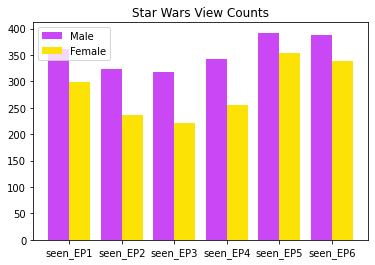

In [21]:
purple_lightsaber = (201/255, 71/255, 245/255)
yellow_lightsaber = (252/255, 226/255, 5/255)

# bar plot for view counts
plt.bar(x=x-0.2, height=males.iloc[:, 3:9].sum(), width=0.4, color=purple_lightsaber, label='Male')
plt.bar(x=x+0.2, height=females.iloc[:, 3:9].sum(), width=0.4, color=yellow_lightsaber, label='Female')
plt.xticks(x, seen_columns)
plt.title('Star Wars View Counts')
plt.legend()

_These colors hurt my eyes but they fit the theme of this project._

We can see from this data that more males have watched the Star Wars movies than females. Although more males have watched the Prequel Trilogy, they also seem to dislike those movies more than females.